In [55]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
from fbprophet import Prophet

#### <u>Warm-up</u>

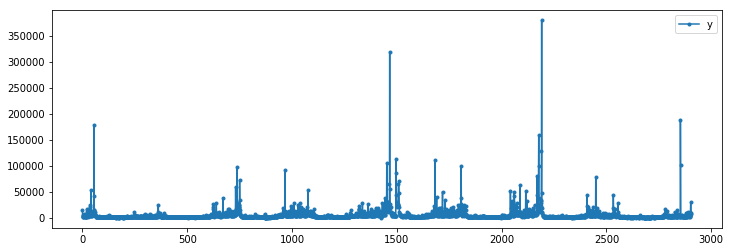

In [10]:
d = pd.read_csv('./dataJar/example_wp_peyton_manning.csv')
d.plot(figsize=(12, 4), marker='.')

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
ds    2905 non-null object
y     2905 non-null int64
dtypes: int64(1), object(1)
memory usage: 45.5+ KB


In [22]:
d['y'] = np.log(d.y)
d.head()

,ds,y,y_l
0,2007-12-10,9.590761,9.590761
1,2007-12-11,8.519590,8.519590
2,2007-12-12,8.183677,8.183677
3,2007-12-13,8.072467,8.072467
4,2007-12-14,7.893572,7.893572


In [23]:
m = Prophet()
m.fit(d);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
future = m.make_future_dataframe(periods=365)

In [39]:
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [25]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 1 columns):
ds    3270 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.6 KB


In [26]:
forecast = m.predict(future)

/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


In [27]:
forecast.tail().T

,3265,3266,3267,3268,3269
ds,2017-01-15 00:00:00,2017-01-16 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00
trend,7.18909,7.18806,7.18703,7.18601,7.18498
yhat_lower,7.50058,7.89235,7.57214,7.43182,7.40573
yhat_upper,8.94246,9.20577,9.06129,8.92697,8.8684
trend_lower,6.79976,6.79759,6.79542,6.7936,6.79188
trend_upper,7.5629,7.56315,7.56341,7.56581,7.567
seasonal,1.01767,1.34371,1.13212,0.965765,0.97871
seasonal_lower,1.01767,1.34371,1.13212,0.965765,0.97871
seasonal_upper,1.01767,1.34371,1.13212,0.965765,0.97871
seasonalities,1.01767,1.34371,1.13212,0.965765,0.97871


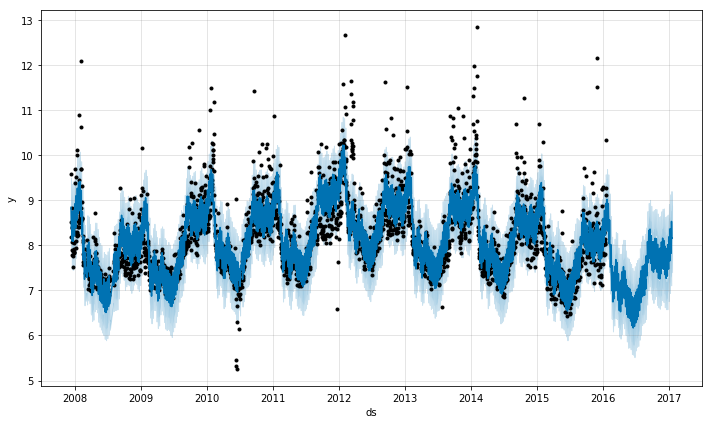

In [28]:
m.plot(forecast);

/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


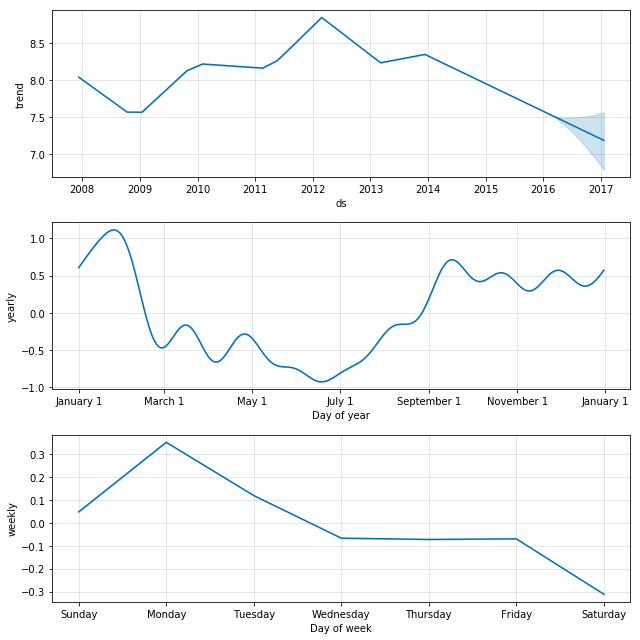

In [29]:
m.plot_components(forecast);

#### <u> IOSTZ</u>

In [ ]:
d = df[['IOSTZ']].resample('MS').mean()
d.rename(columns={'IOSTZ': 'y'}, inplace=True)

In [57]:
didx = pd.date_range(start='9/1/1997', end='11/1/2010', freq='MS') + DateOffset(days=15)

In [59]:
d['ds'] = didx
d = d[['ds', 'y']]

In [60]:
d.head()

,ds,y
,,
1997-09-01,1997-09-16,0.25504
1997-10-01,1997-10-16,0.25901
1997-11-01,1997-11-16,0.25415
1997-12-01,1997-12-16,0.25694
1998-01-01,1998-01-16,0.21884


In [62]:
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1997-09-01 to 2010-11-01
Freq: MS
Data columns (total 2 columns):
ds    159 non-null datetime64[ns]
y     154 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [82]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=12, fourier_order=5)

In [72]:
future = pd.DataFrame(data=pd.date_range(start='9/1/1997',
                                         end='12/1/2011', freq='MS')
                      + DateOffset(days=15), columns=['ds'])

In [73]:
future.head()

,ds
0,1997-09-16
1,1997-10-16
2,1997-11-16
3,1997-12-16
4,1998-01-16


In [74]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 1 columns):
ds    172 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 KB


In [75]:
d.tail()

,ds,y
,,
2010-07-01,2010-07-16,0.21493
2010-08-01,2010-08-16,0.22543
2010-09-01,2010-09-16,0.23303
2010-10-01,2010-10-16,0.26230
2010-11-01,2010-11-16,0.27259


In [76]:
future.tail()

,ds
167,2011-08-16
168,2011-09-16
169,2011-10-16
170,2011-11-16
171,2011-12-16


In [83]:
forecast = m.fit(d).predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


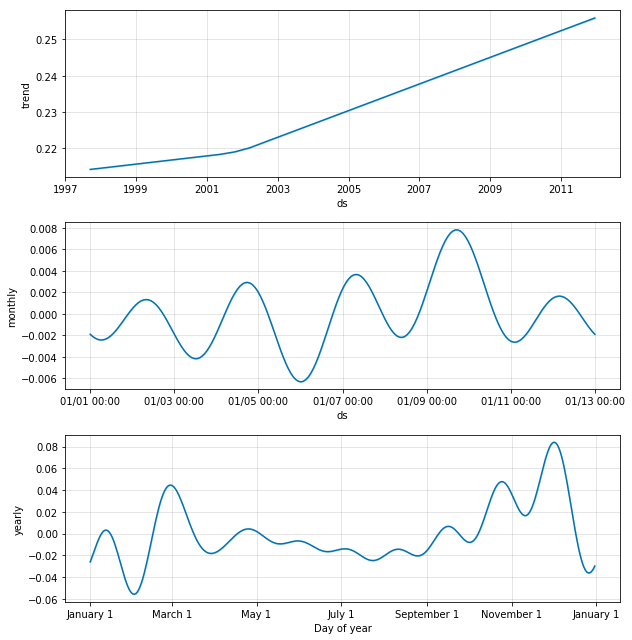

In [84]:
m.plot_components(forecast);

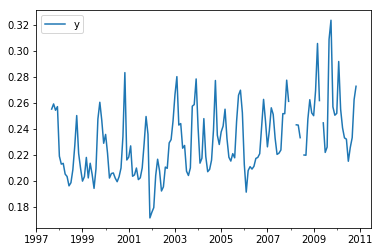

In [81]:
d.plot(y='y')

In [86]:
forecast.T

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
ds,1997-09-16 00:00:00,1997-10-16 00:00:00,1997-11-16 00:00:00,1997-12-16 00:00:00,1998-01-16 00:00:00,1998-02-16 00:00:00,1998-03-16 00:00:00,1998-04-16 00:00:00,1998-05-16 00:00:00,1998-06-16 00:00:00,...,2011-03-16 00:00:00,2011-04-16 00:00:00,2011-05-16 00:00:00,2011-06-16 00:00:00,2011-07-16 00:00:00,2011-08-16 00:00:00,2011-09-16 00:00:00,2011-10-16 00:00:00,2011-11-16 00:00:00,2011-12-16 00:00:00
trend,0.214209,0.214302,0.214398,0.214491,0.214587,0.214683,0.214769,0.214865,0.214958,0.215054,...,0.253154,0.253465,0.253766,0.254078,0.254379,0.254691,0.255002,0.255303,0.255615,0.255916
yhat_lower,0.206378,0.220076,0.214019,0.202559,0.19316,0.197991,0.191187,0.185056,0.185169,0.179554,...,0.23587,0.229641,0.221207,0.212282,0.214104,0.21315,0.237811,0.26008,0.257185,0.23779
yhat_upper,0.250874,0.264607,0.258193,0.248849,0.238129,0.242223,0.238766,0.228081,0.229711,0.225248,...,0.281545,0.273675,0.267357,0.260299,0.258732,0.262632,0.281081,0.306473,0.301812,0.284779
trend_lower,0.214209,0.214302,0.214398,0.214491,0.214587,0.214683,0.214769,0.214865,0.214958,0.215054,...,0.253138,0.25344,0.253733,0.254029,0.254317,0.254618,0.254913,0.255196,0.25549,0.255773
trend_upper,0.214209,0.214302,0.214398,0.214491,0.214587,0.214683,0.214769,0.214865,0.214958,0.215054,...,0.253169,0.253488,0.253799,0.25412,0.254434,0.254759,0.255084,0.2554,0.255726,0.256045
monthly,0.0066472,-0.00182044,-0.00254628,0.00198029,0.00144433,0.00230304,-0.00254628,-0.00632129,0.00144433,0.00230304,...,0.00230304,0.00046921,-0.000419015,-0.00189283,0.00205608,-0.00182044,-0.00254628,0.00198029,0.00144433,-0.00632129
monthly_lower,0.0066472,-0.00182044,-0.00254628,0.00198029,0.00144433,0.00230304,-0.00254628,-0.00632129,0.00144433,0.00230304,...,0.00230304,0.00046921,-0.000419015,-0.00189283,0.00205608,-0.00182044,-0.00254628,0.00198029,0.00144433,-0.00632129
monthly_upper,0.0066472,-0.00182044,-0.00254628,0.00198029,0.00144433,0.00230304,-0.00254628,-0.00632129,0.00144433,0.00230304,...,0.00230304,0.00046921,-0.000419015,-0.00189283,0.00205608,-0.00182044,-0.00254628,0.00198029,0.00144433,-0.00632129
seasonal,0.013246,0.0266114,0.0226063,0.0106099,0.00082922,0.00539053,0.000138787,-0.00795742,-0.00781638,-0.012861,...,0.00576886,-0.00145185,-0.0096161,-0.0169237,-0.0184318,-0.0174653,0.00395993,0.0285352,0.0250295,0.00605636
